In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import MiniBatchKMeans
from pathlib import Path  
import glob
import numpy as np
import re
import pandas as pd
import requests as rq
from bs4 import BeautifulSoup as bs
!pip install underthesea
from underthesea import pos_tag

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 KB 50.0 MB/s eta 0:00:00


In [4]:
Url = "https://vietnamnet.vn/tin-tuc-24h-p"
page = 0
data = []
index = 1

In [5]:
while (index <=10) :
  page += 1
  r = rq.get(Url + str(page))
  print(Url + str(page))
  soup = bs(r.content,"html.parser")
  titles = soup.find_all('h2',class_="feature-box__content--title vnn-title")
  links = [link.find('a').attrs["href"] for link in titles]
  for link in links:
    news = rq.get(link)
    print(link)
    soup = bs(news.content,"html.parser")
    noidung = ""
    theloai = ""
    try :
      divtt = soup.find('div',class_="bread-crumb-detail") 
      div = soup.find('div',class_="maincontent")
      title = soup.find('h1',class_="content-detail-title").text
      mota = soup.find('h2',class_="content-detail-sapo").text
      theloai1 = divtt.find_all('a')
      for i in (theloai1):
                theloai = i.text
      noidung1 = div.find_all('p')
      for i in (noidung1):
                noidung += (i.text  + " ")
      collections_data = {
          'Tiêu đề':title,
          'Mô tả':mota.strip(),
          'Thể loại':theloai.strip(),
          'Nội dung':noidung
      }
      data.append(collections_data)
      print(30*"*")
      print("Tiêu đề:",title)
      print("Thể loại:",theloai.strip())
      print("Mô tả:",mota.strip())
    except: 
      continue
    index +=1
    if(index >=10) : break
df = pd.DataFrame(data)
df.to_excel('data1.xlsx')

https://vietnamnet.vn/tin-tuc-24h-p1
https://vietnamnet.vn/le-au-ngan-anh-hon-chong-mc-noi-tieng-huong-trang-mat-ngot-ngao-tai-nhat-ban-2122392.html
******************************
Tiêu đề: Ngân Anh cùng chồng MC nổi tiếng đi trăng mật ở Nhật Bản
Thể loại: Giải trí
Mô tả: Sau lễ cưới 4 tháng, Lê Âu Ngân Anh và MC Phan Tô Ny cùng nhau đi du lịch, hưởng trăng mật lãng mạn ở Nhật Bản.
https://vietnamnet.vn/khoi-to-4-doi-tuong-be-khoa-nha-che-camera-trom-gan-nua-ty-dong-2122430.html
******************************
Tiêu đề: Khởi tố 4 đối tượng bẻ khóa nhà, che camera trộm gần nửa tỷ đồng
Thể loại: Pháp luật
Mô tả: Ngày 20/3, Công an TP Biên Hòa (Đồng Nai) cho biết, vừa khởi tố vụ án hình sự, khởi tố bị can, bắt tạm giam 4 đối tượng để điều tra, làm rõ hành vi trộm cắp tài sản.
https://vietnamnet.vn/bat-3-doi-tuong-trong-duong-day-mua-ban-che-tao-vu-khi-thu-14-khau-sung-2122428.html
******************************
Tiêu đề: Bắt 3 đối tượng trong đường dây mua bán, chế tạo vũ khí, thu 14 khẩu sún

In [43]:
df = pd.read_excel('/content/data1.xlsx')
df.head()

,Unnamed: 0,Tiêu đề,Mô tả,Thể loại,Nội dung
0,0,Ngân Anh cùng chồng MC nổi tiếng đi trăng mật ...,"Sau lễ cưới 4 tháng, Lê Âu Ngân Anh và MC Phan...",Giải trí,Diệu Thu
1,1,"Khởi tố 4 đối tượng bẻ khóa nhà, che camera tr...","Ngày 20/3, Công an TP Biên Hòa (Đồng Nai) cho ...",Pháp luật,"Các đối tượng bị khởi tố, bắt giam gồm: Nguyễn..."
2,2,"Bắt 3 đối tượng trong đường dây mua bán, chế t...",Công an Đồng Nai vừa triệt phá đường dây mua b...,Pháp luật,"Ngày 20/3, Công an Đồng Nai cho biết vừa bắt g..."
3,3,Mang hơn 8kg cây thuốc phiện đi đầu thú khi đồ...,"Công an phát hiện, bắt giữ Bùi Văn Nghĩa đang ...",Thời sự,"Sáng 20/3, Công an huyện Thạch Thất, Hà Nội ch..."
4,4,ĐH Quốc gia TP.HCM công bố 47 cụm thi đánh giá...,ĐH Quốc gia TP.HCM công bố thông tin chi tiết ...,Tuyển sinh,Cụ thể như sau: Kỳ thi đánh giá năng lực đợt ...


In [44]:
CLEANR = re.compile('<.*?>')
def XoaHTML(str):
  id = 0
  for e in df[str]: 
    try :
      df[str][id] = re.sub(CLEANR, '', e)
      id+=1
    except:
      id+=1
      continue
XoaHTML("Tiêu đề")
XoaHTML("Mô tả")
XoaHTML("Nội dung")
df.head()

<ipython-input-44-40f7a4a030ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str][id] = re.sub(CLEANR, '', e)


,Unnamed: 0,Tiêu đề,Mô tả,Thể loại,Nội dung
0,0,Ngân Anh cùng chồng MC nổi tiếng đi trăng mật ...,"Sau lễ cưới 4 tháng, Lê Âu Ngân Anh và MC Phan...",Giải trí,Diệu Thu
1,1,"Khởi tố 4 đối tượng bẻ khóa nhà, che camera tr...","Ngày 20/3, Công an TP Biên Hòa (Đồng Nai) cho ...",Pháp luật,"Các đối tượng bị khởi tố, bắt giam gồm: Nguyễn..."
2,2,"Bắt 3 đối tượng trong đường dây mua bán, chế t...",Công an Đồng Nai vừa triệt phá đường dây mua b...,Pháp luật,"Ngày 20/3, Công an Đồng Nai cho biết vừa bắt g..."
3,3,Mang hơn 8kg cây thuốc phiện đi đầu thú khi đồ...,"Công an phát hiện, bắt giữ Bùi Văn Nghĩa đang ...",Thời sự,"Sáng 20/3, Công an huyện Thạch Thất, Hà Nội ch..."
4,4,ĐH Quốc gia TP.HCM công bố 47 cụm thi đánh giá...,ĐH Quốc gia TP.HCM công bố thông tin chi tiết ...,Tuyển sinh,Cụ thể như sau: Kỳ thi đánh giá năng lực đợt ...


In [45]:
def XoaSo(str):
  id = 0
  for e in df[str]:
    try:
      df[str][id] = ''.join([i for i in e if not i.isdigit()])
      id +=1
    except:
      id +=1
      continue
XoaSo("Tiêu đề")
XoaSo("Mô tả")
XoaSo("Nội dung")
df.head()

<ipython-input-45-7e2515bd38f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str][id] = ''.join([i for i in e if not i.isdigit()])


,Unnamed: 0,Tiêu đề,Mô tả,Thể loại,Nội dung
0,0,Ngân Anh cùng chồng MC nổi tiếng đi trăng mật ...,"Sau lễ cưới tháng, Lê Âu Ngân Anh và MC Phan ...",Giải trí,Diệu Thu
1,1,"Khởi tố đối tượng bẻ khóa nhà, che camera trộ...","Ngày /, Công an TP Biên Hòa (Đồng Nai) cho biế...",Pháp luật,"Các đối tượng bị khởi tố, bắt giam gồm: Nguyễn..."
2,2,"Bắt đối tượng trong đường dây mua bán, chế tạ...",Công an Đồng Nai vừa triệt phá đường dây mua b...,Pháp luật,"Ngày /, Công an Đồng Nai cho biết vừa bắt giữ ..."
3,3,Mang hơn kg cây thuốc phiện đi đầu thú khi đồn...,"Công an phát hiện, bắt giữ Bùi Văn Nghĩa đang ...",Thời sự,"Sáng /, Công an huyện Thạch Thất, Hà Nội cho b..."
4,4,ĐH Quốc gia TP.HCM công bố cụm thi đánh giá n...,ĐH Quốc gia TP.HCM công bố thông tin chi tiết ...,Tuyển sinh,Cụ thể như sau: Kỳ thi đánh giá năng lực đợt ...


In [46]:
def XoaKiTu(str):
  id = 0
  for e in df[str]:
    try:
      df[str][id] = ''.join([i for i in e if i.isalnum() or i.isspace()])
      id +=1
    except:
      id +=1
      continue
XoaKiTu("Tiêu đề")
XoaKiTu("Mô tả")
XoaKiTu("Nội dung")
df.head()

<ipython-input-46-baea2000d5c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str][id] = ''.join([i for i in e if i.isalnum() or i.isspace()])


,Unnamed: 0,Tiêu đề,Mô tả,Thể loại,Nội dung
0,0,Ngân Anh cùng chồng MC nổi tiếng đi trăng mật ...,Sau lễ cưới tháng Lê Âu Ngân Anh và MC Phan T...,Giải trí,Diệu Thu
1,1,Khởi tố đối tượng bẻ khóa nhà che camera trộm...,Ngày Công an TP Biên Hòa Đồng Nai cho biết vừ...,Pháp luật,Các đối tượng bị khởi tố bắt giam gồm Nguyễn A...
2,2,Bắt đối tượng trong đường dây mua bán chế tạo...,Công an Đồng Nai vừa triệt phá đường dây mua b...,Pháp luật,Ngày Công an Đồng Nai cho biết vừa bắt giữ đ...
3,3,Mang hơn kg cây thuốc phiện đi đầu thú khi đồn...,Công an phát hiện bắt giữ Bùi Văn Nghĩa đang c...,Thời sự,Sáng Công an huyện Thạch Thất Hà Nội cho biết...
4,4,ĐH Quốc gia TPHCM công bố cụm thi đánh giá nă...,ĐH Quốc gia TPHCM công bố thông tin chi tiết ...,Tuyển sinh,Cụ thể như sau Kỳ thi đánh giá năng lực đợt ...


In [47]:
def HaChu(str):
  id = 0
  for e in df[str]:
    try:
      df[str][id] = e.lower()
      id +=1
    except:
      id +=1
      continue
HaChu("Tiêu đề")
HaChu("Mô tả")
HaChu("Nội dung")
df.head()

<ipython-input-47-41e94905c51f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str][id] = e.lower()


,Unnamed: 0,Tiêu đề,Mô tả,Thể loại,Nội dung
0,0,ngân anh cùng chồng mc nổi tiếng đi trăng mật ...,sau lễ cưới tháng lê âu ngân anh và mc phan t...,Giải trí,diệu thu
1,1,khởi tố đối tượng bẻ khóa nhà che camera trộm...,ngày công an tp biên hòa đồng nai cho biết vừ...,Pháp luật,các đối tượng bị khởi tố bắt giam gồm nguyễn a...
2,2,bắt đối tượng trong đường dây mua bán chế tạo...,công an đồng nai vừa triệt phá đường dây mua b...,Pháp luật,ngày công an đồng nai cho biết vừa bắt giữ đ...
3,3,mang hơn kg cây thuốc phiện đi đầu thú khi đồn...,công an phát hiện bắt giữ bùi văn nghĩa đang c...,Thời sự,sáng công an huyện thạch thất hà nội cho biết...
4,4,đh quốc gia tphcm công bố cụm thi đánh giá nă...,đh quốc gia tphcm công bố thông tin chi tiết ...,Tuyển sinh,cụ thể như sau kỳ thi đánh giá năng lực đợt ...


In [48]:
df.to_excel('datafixed.xlsx')

In [49]:
import regex as re

uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"


def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic


dicchar = loaddicchar()


def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)


def vn_word_to_telex_type(word):
    dau_cau = 0
    new_word = ''
    for char in word:
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            new_word += char
            continue
        if y != 0:
            dau_cau = y
        new_word += bang_nguyen_am[x][-1]
    new_word += bang_ky_tu_dau[dau_cau]
    return new_word


def vn_sentence_to_telex_type(sentence):
    words = sentence.split()
    for index, word in enumerate(words):
        words[index] = vn_word_to_telex_type(word)
    return ' '.join(words)

def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            # for index2 in nguyen_am_index:
            #     if index2 != index:
            #         x, y = nguyen_am_to_ids[chars[index]]
            #         chars[index2] = bang_nguyen_am[x][0]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
        else:
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
        # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
        # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
    return ''.join(chars)


def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True


def chuan_hoa_dau_cau_tieng_viet(sentence):
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        # print(cw)
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)
    id=0
    for f in df[str]:
      df[str][id] = ' '.join(words)
      id+=1
chuan_hoa_dau_cau_tieng_viet('Tiêu đề')
chuan_hoa_dau_cau_tieng_viet('Thể loại')
chuan_hoa_dau_cau_tieng_viet('Mô tả')
chuan_hoa_dau_cau_tieng_viet('Nội dung')

df.to_excel('data.xlsx')
df.head()

,Unnamed: 0,Tiêu đề,Mô tả,Thể loại,Nội dung
0,0,ngân anh cùng chồng mc nổi tiếng đi trăng mật ...,sau lễ cưới tháng lê âu ngân anh và mc phan t...,Giải trí,diệu thu
1,1,khởi tố đối tượng bẻ khóa nhà che camera trộm...,ngày công an tp biên hòa đồng nai cho biết vừ...,Pháp luật,các đối tượng bị khởi tố bắt giam gồm nguyễn a...
2,2,bắt đối tượng trong đường dây mua bán chế tạo...,công an đồng nai vừa triệt phá đường dây mua b...,Pháp luật,ngày công an đồng nai cho biết vừa bắt giữ đ...
3,3,mang hơn kg cây thuốc phiện đi đầu thú khi đồn...,công an phát hiện bắt giữ bùi văn nghĩa đang c...,Thời sự,sáng công an huyện thạch thất hà nội cho biết...
4,4,đh quốc gia tphcm công bố cụm thi đánh giá nă...,đh quốc gia tphcm công bố thông tin chi tiết ...,Tuyển sinh,cụ thể như sau kỳ thi đánh giá năng lực đợt ...


In [50]:
rd = pd.read_excel('data.xlsx')
dt = pd.DataFrame(rd, columns = ['Nội dung', 'Tiêu đề', 'Mô tả'])
# Lấy cột chứa văn bản cần xử lý
Title = dt["Nội dung"]
Description = dt["Tiêu đề"]
Content = dt["Nội dung"]
url = ('https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt')
response = rq.get(url)
stopwords = response.content.decode('utf-8').split('\n')
def stopword(str):
  id=0
  for f in df[str]:
    try:
      df[str][id] = ' '.join([word for word in f.split() if word.lower() not in stopwords])
      id+=1
    except:
      id+=1
      continue
  # print(str[i])
stopword('Nội dung')
stopword('Tiêu đề')
stopword('Mô tả')
df.to_excel('data.xlsx')
df.head()

<ipython-input-50-595189753f9f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str][id] = ' '.join([word for word in f.split() if word.lower() not in stopwords])


,Unnamed: 0,Tiêu đề,Mô tả,Thể loại,Nội dung
0,0,ngân chồng mc nổi tiếng đi trăng mật nhật,lễ cưới lê âu ngân mc phan tô ny đi du lịch hư...,Giải trí,diệu thu
1,1,khởi tố đối tượng bẻ khóa che camera trộm nửa ...,công an tp biên hòa đồng nai khởi tố vụ án hìn...,Pháp luật,đối tượng khởi tố bắt giam nguyễn khoa nguyễn ...
2,2,bắt đối tượng đường dây mua chế vũ khí thu khẩ...,công an đồng nai triệt phá đường dây mua tàng ...,Pháp luật,công an đồng nai bắt đối tượng liên quan đường...
3,3,kg thuốc phiện đi đầu thú đồng bọn bắt,công an phát hiện bắt bùi văn nghĩa hành vi mu...,Thời sự,công an huyện thạch thất hà nội khởi tố vụ án ...
4,4,đh quốc gia tphcm công bố cụm thi đánh giá năn...,đh quốc gia tphcm công bố thông chi tiết cụm t...,Tuyển sinh,cụ thể kỳ thi đánh giá năng lực đợt đh quốc gi...


In [51]:
from underthesea import word_tokenize
def NguNghia(str):
  id = 0
  for f in df[str]: 
    try:
      df[str][id] = word_tokenize(f,format = 'text')
      id+=1
    except:
      id+=1
      continue
NguNghia("Nội dung")
df.to_excel('data_nn.xlsx',index = False)
datan = pd.read_excel("/content/data_nn.xlsx")
datan

<ipython-input-51-2603dd9196c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str][id] = word_tokenize(f,format = 'text')


,Unnamed: 0,Tiêu đề,Mô tả,Thể loại,Nội dung
0,0,ngân chồng mc nổi tiếng đi trăng mật nhật,lễ cưới lê âu ngân mc phan tô ny đi du lịch hư...,Giải trí,diệu thu
1,1,khởi tố đối tượng bẻ khóa che camera trộm nửa ...,công an tp biên hòa đồng nai khởi tố vụ án hìn...,Pháp luật,đối_tượng khởi_tố bắt giam nguyễn_khoa nguyễn_...
2,2,bắt đối tượng đường dây mua chế vũ khí thu khẩ...,công an đồng nai triệt phá đường dây mua tàng ...,Pháp luật,công_an đồng nai bắt đối_tượng liên_quan đường...
3,3,kg thuốc phiện đi đầu thú đồng bọn bắt,công an phát hiện bắt bùi văn nghĩa hành vi mu...,Thời sự,công_an huyện thạch_thất hà_nội khởi_tố vụ_án ...
4,4,đh quốc gia tphcm công bố cụm thi đánh giá năn...,đh quốc gia tphcm công bố thông chi tiết cụm t...,Tuyển sinh,cụ_thể kỳ thi đánh_giá năng_lực đợt đh quốc_gi...
5,5,x hà tĩnh mê phượt chinh phục tứ đại đỉnh đèo ...,đam mê xê dịch mạo hiểm ngăn cản gia đình nguy...,Đời sống,đam_mê chinh_phục đỉnh tổ_quốc mặc bận_rộn côn...
6,6,thuốc mắt nghi ngờ tử vong trường hợp mù,bệnh nhân tử vong trường hợp thị lực sĩ nghi n...,Sức khỏe,trung_tâm kiểm_soát phòng_ngừa dịch_bệnh cdc m...
7,7,phát hiện xe gắn tem kiểm định giả tài xế khai...,xe hạn đăng kiểm khăn tài tài xế c mạng mua te...,Thời sự,đội tuần_tra kiểm_soát giao_thông đường tốc độ...
8,8,thu hồi lô kem dưỡng trắng da pc whitening cream,lô sản phẩm pc whitening cream g sản xuất tphc...,Sức khỏe,cục quản_lý dược y_tế thông_báo đình lưu_hành ...
9,9,chánh án tand tối án hành tồn,chánh án tand tối nguyễn hòa bình thừa án hành...,Chính trị,chánh_án tòa_án nhân_dân_tối nguyễn_hòa_bình c...


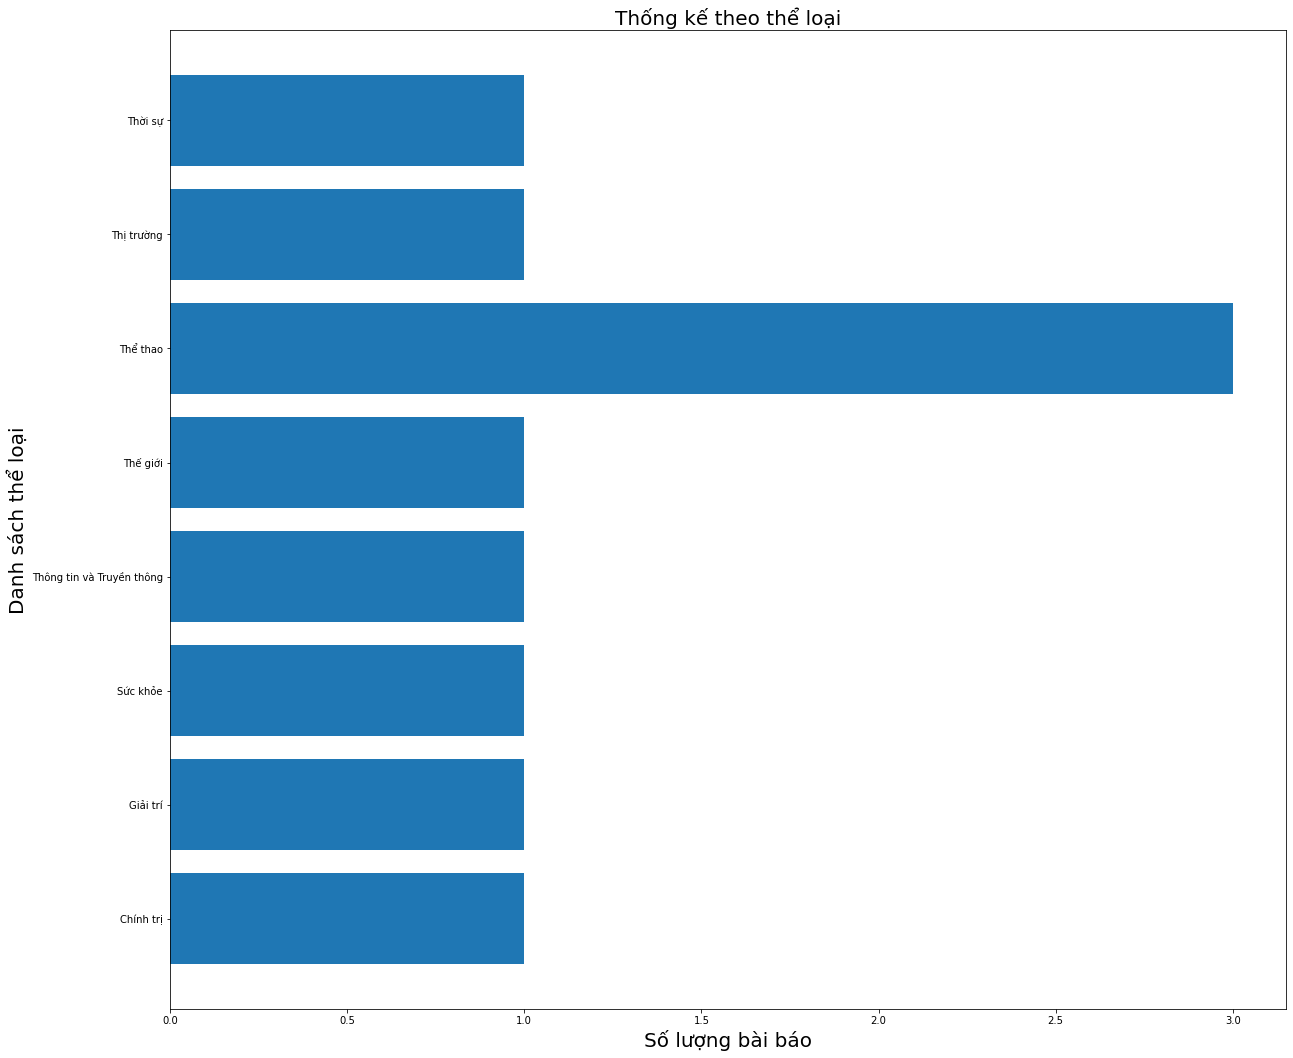

In [ ]:
datatext = pd.read_excel("/content/data1.xlsx")
datatext
dstheloai = datatext.groupby(["Thể loại"]).count()
dstheloai.to_excel("dstheloai.xlsx")
dstheloai = datatext.groupby(["Thể loại"]).count()
import matplotlib.pyplot as plt

tongtheloai = pd.read_excel("dstheloai.xlsx")

x = tongtheloai['Thể loại']
y = tongtheloai['Mô tả']


plt.figure(figsize=(20,18))
plt.barh(x,y)
plt.xlabel("Số lượng bài báo", fontsize = 20)
plt.ylabel("Danh sách thể loại", fontsize = 20)
plt.title("Thống kế theo thể loại", fontsize = 20)
plt.show()

In [ ]:
#tfidf = TfidfVectorizer()

#tfidf.fit(df['word'])
#text = tfidf.transform(df['word'])

rd = pd.read_excel('data.xlsx')
dt = pd.DataFrame(rd, columns = ['Nội dung','Tiêu đề','Mô tả'])  

vectorizer = CountVectorizer()

def vector(str):
  a_vector=[]
  for doc in str:

    try:
      vector = vectorizer.fit_transform(str).toarray()
      a_vector.append(vector)
    except:
      continue
  return(a_vector)
# vector(dt["Nội dung"])
# vector(dt["Tiêu đề"])
# vector(dt["Mô tả"])
vectors =  {
    'Tiêu đề:': vector(dt["Tiêu đề"]),
    'Mô tả:': vector(dt["Mô tả"]),
    # 'Thể loại:': vector(dt["Thể loại"]),
    'Nội dung:': vector(dt["Nội dung"]),
}
vectors

# search_term = input()
# word_index = vectorizer.vocabulary_[search_term]

# # Tính phần trăm độ chính xác của từ "chim"
# accuracy = vector[:, word_index].sum() / vector.sum()

# print("Phần trăm độ chính xác của từ 'chim' là:", accuracy * 100, "%")

{'Tiêu đề:': [array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
          0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
          1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
          0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          0, 0],
         [0, 0, 0, 0, 0, 

In [ ]:
def KMPSearch(pat, txt):
    M = len(pat)
    N = len(txt)
 
    # create lps[] that will hold the longest prefix suffix
    # values for pattern
    lps = [0]*M
    j = 0 # index for pat[]
 
    # Preprocess the pattern (calculate lps[] array)
    computeLPSArray(pat, M, lps)
 
    i = 0 # index for txt[]
    while i < N:
        if pat[j] == txt[i]:
            i += 1
            j += 1
 
        if j == M:
            return 1
 
        # mismatch after j matches
        elif i < N and pat[j] != txt[i]:
            # Do not match lps[0..lps[j-1]] characters,
            # they will match anyway
            if j != 0:
                j = lps[j-1]
            else:
                i += 1
 
def computeLPSArray(pat, M, lps):
    len = 0 # length of the previous longest prefix suffix
 
    lps[0] # lps[0] is always 0
    i = 1
 
    # the loop calculates lps[i] for i = 1 to M-1
    while i < M:
        if pat[i]== pat[len]:
            len += 1
            lps[i] = len
            i += 1
        else:
            # This is tricky. Consider the example.
            # AAACAAAA and i = 7. The idea is similar
            # to search step.
            if len != 0:
                len = lps[len-1]
 
                # Also, note that we do not increment i here
            else:
                lps[i] = 0
                i += 1
 
rd = pd.read_excel('data.xlsx')
dt = pd.DataFrame(rd, columns = ['Nội dung'])
# Lấy cột chứa văn bản cần xử lý
# Title = dt["Nội dung"]

# import re 
# s = input() 
# str = dt["Nội dung"]
# matches = re.search(s, str)
# print(type(matches))
# print(matches)

def search(str):
  s = input()
  id=0
  for f in dt[str]:
    try:
      if(KMPSearch(s, f)==1):
        print(dt[str][id])

      #df[str][id] = re.search(s, f)
      id+=1
    except:
      continue
  #print(df[str][id])
search('Nội dung')
# search('Nội dung')

hảo
giá vé máy bay dịp vọt tour quốc tế đắt hàng dịp lễ trùng lễ giỗ tổ hùng vương thời gian nghỉ đi du lịch tour kín chỗ giá vé máy bay chặng nội địa báo dân trí khởi hành hà nội tphcm du lịch nổi tiếng phú quốc đà lạt huế đà nẵng côn đảo nha trang giá vé máy bay khứ hồi thời gian dao động triệu đồng thuế phí chặng triệu đồngkhứ hồi giá vé chặng bay quốc tế gấp đôi gấp tỉ lệ tour xuất ngoại xu hướng tour du lịch thái lan campuchia singapore malaysia hàn quốc nhật đài loan dubai giá triệu đồngngười hành trình việt quan tâm báo phụ nữ tphcm giá tour du lịch hầu dịch vụ giá dâu tây gắn mác đà lạt sơn la tràn ngập đường phố tphcm giá rẻ bất ngờ ghi phóng viên báo lao động thị trường tphcm mặt hàng dâu tây giá rẻ bất ngờ đồng tiêu thể sở hữu hộp nửa ký dâu tây dâu tây gốc nhập khẩu trung quốc dâu tây đà lạt sơn la đầu chuyên kinh doanh sỉ dâu tươi tphcm bao dâu tươi dội chợ hiện hàng trung quốc giá rẻ nhập khẩu rau rừng rủ chợ thủ đô giá đắt hàng mùa rau rừng chợ hà nội giá đắt đỏ cụ thể r

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# rd = pd.read_excel('data.xlsx')
# dt = pd.DataFrame(rd, columns = ['Nội dung'])
# Tạo một đối tượng CountVectorizer
vectorizer = CountVectorizer()

# # Chuẩn bị dữ liệu văn b/ản

rd = pd.read_excel('data.xlsx')
dt = pd.DataFrame(rd, columns = ['Nội dung'])

def search(str):
  s = input()
  id=0
  for f in dt[str]:
    try:
      vector = vectorizer.fit_transform(dt['Nội dung']).toarray()
      word_index = vectorizer.vocabulary_[s]

      #df[str][id] = re.search(s, f)
      id+=1
    except:
      continue
  #print(df[str][id])

  #print(vector)
  pos = np.argmax(vector[:, word_index])

  accuracy = vector[pos, word_index] / np.sum(vector) * 100

  # accuracy = vector[:, word_index].sum() / vector.sum()
  print(f"Vị trí của từ: {pos}")
  print("Phần trăm độ chính xác của từ là:", accuracy * 100, "%")
search('Nội dung')

# Chuyển đổi văn bản thành vector


# Tìm vị trí của từ "chim" trong vector


# Tính phần trăm độ chính xác của từ "chim"
# accuracy = vector[:, word_index].sum() / vector.sum()

# print("Phần trăm độ chính xác của từ 'chim' là:", accuracy * 100, "%")


nam
Vị trí của từ: 9
Phần trăm độ chính xác của từ là: 7.7249903437620695 %


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Khởi tạo đối tượng TfidfVectorizer với các tham số tùy chỉnh
tfidf_vectorizer = TfidfVectorizer()

rd = pd.read_excel('data_nn.xlsx')
dt = pd.DataFrame(rd, columns = ['Nội dung'])

# Tạo một danh sách các câu để tạo thành các vector
sentences = ["This is the first sentence", "This is the second sentence", "This is the third sentence"]

# Sử dụng TfidfVectorizer để tạo ma trận tf-idf
tfidf_matrix = tfidf_vectorizer.fit_transform(dt['Nội dung'])

# Tính toán độ tương ứng giữa các vector bằng cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix)

# In ra độ tương ứng giữa các vector
#print("Similarity matrix:")
#print(similarity_matrix)

# Chọn một dòng cần tìm kiếm độ tương ứng
query = input("Nhập từ cần tìm: ")
query = ''.join([i for i in query if not i.isdigit()])
query = ''.join([i for i in query if i.isalnum() or i.isspace()])
query = query.lower()
query = ' '.join([word for word in query.split() if word.lower() not in stopwords])
#query = word_tokenize(query)

# Chuyển đổi dòng cần tìm kiếm thành vector tf-idf
query_tfidf = tfidf_vectorizer.transform([query])

# Tính toán độ tương ứng giữa vector tf-idf của dòng cần tìm kiếm và các vector khác
similarity_scores = cosine_similarity(query_tfidf, tfidf_matrix).flatten()

# Sắp xếp các dòng theo thứ tự độ tương ứng giảm dần
related_indices = similarity_scores.argsort()[::-1]

# In ra các dòng liên quan và độ tương ứng của từng dòng
print("Related sentences and similarity scores:")
i = 0
for f in dt['Nội dung']:
  try:
    if(similarity_scores[i] > 0):
      print(dt['Nội dung'][i])
      print(similarity_scores[i])
    i+=1
  except:
    i+=1
    continue
    

Nhập từ cần tìm: Nguyễn Xuân Phúc
Related sentences and similarity scores:
đam_mê chinh_phục đỉnh tổ_quốc mặc bận_rộn công nguyễn_viết hoàng yêu di đam_mê khám_phá đất công áp_lực căng_thẳng lựa đi đi giải_tỏa đầu_óc giúp tinh_thần trở thư_thái đam_mê du_lịch mong hoàng chinh_phục cung đường hiểm_trở dám trải_nghiệm mục_tiêu hàng nghìn chân đỉnh tứ đại đỉnh đèo đèo đèo mã pí lèng đèo ô quy hồ đèo khau phạ đèo pha đin đèo tọa_lạc tỉnh tây_bắc nhiên sở_hữu cung đèo uốn_lượn hiểm_trở bậc việt nam đường đèo quanh_co gập_ghềnh đi nhiên quang_cảnh đèo hùng_vĩ kém thơ_mộng thúc phượt_thủ quyết_tâm chinh_phục hoàng định chinh_phục tứ đại đỉnh đèo khuyên đừng đi nguy_hiểm vợ vợ lo_lắng tôn_trọng kiến hoàng định khát_khao nhiên lửa đam_mê rực cháy thúc thực_hiện mong suy kỹ hoàng quyết_tâm cãi vợ hoàn_thành đam_mê quyết_định chinh_phục tứ đại đỉnh đèo vợ chí giận_dỗi tuyệt_thực năn_nỉ dần nguôi_ngoai chấp hứa an_toàn_thân hoàng chia_sẻ kinh_nghiệm sống phượt_thủ đích_thực nguyễn viết hoàng thực_